<a href="https://colab.research.google.com/github/felipebmuniz/anlise-de-dados-TRB1/blob/main/analise/estatisticaDescritivaCasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas para a realização do trabalho de análise dos dados dos datasets;

In [376]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean,hmean
from scipy import stats
from cycler import cycler
from sklearn.model_selection import train_test_split

%matplotlib inline

# carregando dataset Iris
from sklearn.datasets import load_iris

# carregando dataset Wine
from sklearn.datasets import load_wine

# carregando dataset Diabetes
from sklearn.datasets import load_diabetes

# carregando dataset California Housing
from sklearn.datasets import fetch_california_housing

# <b>Treinando a manipulação do dataset (IRIS)</b>

## Usando os exemplos do site da Scikit Learn

- IRIS:


Chamada e set dos valores dos dados

In [377]:
iris = load_iris()
iris.target[[10, 25, 50]]

array([0, 0, 1])

In [378]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

Mudança da passagem dos valores para uma notação da scikit learn:

In [379]:
X,y = load_iris(return_X_y=True)

Definindo os valores para a tabela do dataframe da base de dados da iris.

In [380]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [381]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Adicionando uma nova coluna para a análise dos dados.

In [382]:
iris_df['target'] = iris.target

In [383]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Definindo uma nova amostragem na tabela pra mostrar os nomes dos tipos das amostras.

In [384]:
iris_df['target names'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [385]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Realizando uma plotagem dos dados para amostragem: 

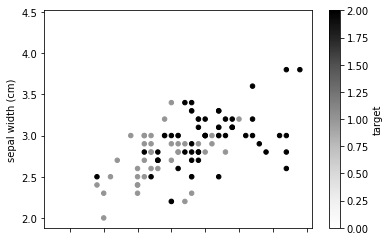

In [386]:
iris_df.plot.scatter('sepal length (cm)', 'sepal width (cm)', c='target')

Executando o pré-processamento e dividindo os dados em teste e treinamento.

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [388]:
X_train.shape

(105, 4)

In [389]:
X_test.shape

(45, 4)

Verificar os dados da estatística descritiva de dois atributos do dataset:

In [390]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Verificando as informações do conjunto de dados.

In [391]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int64   
 5   target names       150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [392]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Calculando a média aritmética.

In [393]:
sepalL = iris_df["sepal length (cm)"]
sepalL.mean()

5.843333333333335

In [394]:
sepalW = iris_df["sepal width (cm)"]
sepalW.mean()

3.057333333333334

Média geométrica

In [395]:
gmean(sepalL)

5.785720390427728

In [396]:
gmean(sepalW)

3.02659784973356

Média Harmônica

In [397]:
hmean(sepalL)

5.728905057850834

In [398]:
hmean(sepalW)

2.995815074916938

Mediana

In [399]:
sepalL.median()

5.8

In [400]:
sepalW.median()

3.0

Moda

In [401]:
sepalL.mode()

0    5.0
dtype: float64

In [402]:
sepalW.mode()

0    3.0
dtype: float64

Variação

In [403]:
sepalL.var()

0.6856935123042505

In [404]:
sepalW.var()

0.1899794183445188

Desvio padrão

In [405]:
sepalL.std()

0.8280661279778629

In [406]:
sepalW.std()

0.435866284936698

Valor máximo

In [407]:
sepalL.max()

7.9

In [408]:
sepalW.max()

4.4

Valor mínimo

In [409]:
sepalL.min()

4.3

In [410]:
sepalW.min()

2.0

# <b>Treinando a manipulação do dataset (Wine)</b>

## Usando os exemplos do site da Scikit Learn

- Wine:


Chamada e set dos valores dos dados

In [411]:
dataset_wine = load_wine()
dataset_wine.target[[10, 25, 50]]

array([0, 0, 0])

In [412]:
list(dataset_wine.target_names)

['class_0', 'class_1', 'class_2']

Mudança da passagem dos valores para uma notação da scikit learn:

In [413]:
X,y = load_wine(return_X_y=True)

Definindo os valores para a tabela do dataframe da base de dados da iris.

In [414]:
dataset_wine_df = pd.DataFrame(data=dataset_wine.data, columns=dataset_wine.feature_names)

In [415]:
dataset_wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Adicionando uma nova coluna para a análise dos dados.

In [416]:
dataset_wine_df['target'] = dataset_wine.target

In [417]:
dataset_wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Realizando uma plotagem dos dados para amostragem: 

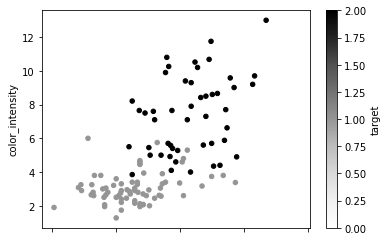

In [418]:
dataset_wine_df.plot.scatter('alcohol', 'color_intensity', c='target')

Executando o pré-processamento e dividindo os dados em teste e treinamento.

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [420]:
X_train.shape

(124, 13)

In [421]:
X_test.shape

(54, 13)

Verificar os dados da estatística descritiva de dois atributos do dataset:

In [422]:
dataset_wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Verificando as informações do conjunto de dados.

In [423]:
dataset_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [424]:
dataset_wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Calculando a média aritmética.

In [425]:
primaryType = dataset_wine_df['alcohol']
primaryType.mean()

13.000617977528083

In [426]:
secondaryType = dataset_wine_df['color_intensity']
secondaryType.mean()

5.058089882022473

Média geométrica

In [427]:
np.seterr(invalid='ignore')
gmean(primaryType)

12.975278352602606

In [428]:
gmean(secondaryType)

4.563233469063698

Média Harmônica

In [429]:
hmean(primaryType)

12.949820740397149

In [430]:
hmean(secondaryType)

4.106418879856926

Mediana

In [431]:
primaryType.median()

13.05

In [432]:
secondaryType.median()

4.6899999999999995

Moda

In [433]:
primaryType.mode()

0    12.37
1    13.05
dtype: float64

In [434]:
secondaryType.mode()

0    2.6
1    3.8
2    4.6
dtype: float64

Variação

In [435]:
primaryType.var()

0.6590623278105763

In [436]:
secondaryType.var()

5.374449383491404

Desvio padrão

In [437]:
primaryType.std()

0.8118265380058577

In [438]:
secondaryType.std()

2.318285871822413

Valor máximo

In [439]:
primaryType.max()

14.83

In [440]:
secondaryType.max()

13.0

Valor mínimo

In [441]:
primaryType.min()

11.03

In [442]:
secondaryType.min()

1.28

# <b>Treinando a manipulação do dataset (Diabetes)</b>

## Usando os exemplos do site da Scikit Learn

- Diabetes:


Chamada e set dos valores dos dados

In [443]:
dataset = load_diabetes()
dataset.target[[10, 25, 50]]

array([101., 202., 155.])

In [444]:
list(dataset.target_filename)

['d',
 'i',
 'a',
 'b',
 'e',
 't',
 'e',
 's',
 '_',
 't',
 'a',
 'r',
 'g',
 'e',
 't',
 '.',
 'c',
 's',
 'v',
 '.',
 'g',
 'z']

Mudança da passagem dos valores para uma notação da scikit learn:

In [445]:
X,y = load_diabetes(return_X_y=True)

Definindo os valores para a tabela do dataframe da base de dados da iris.

In [446]:
dataset_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [447]:
dataset_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


Adicionando uma nova coluna para a análise dos dados.

In [448]:
dataset_df['target'] = dataset.target

In [449]:
dataset_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Realizando uma plotagem dos dados para amostragem: 

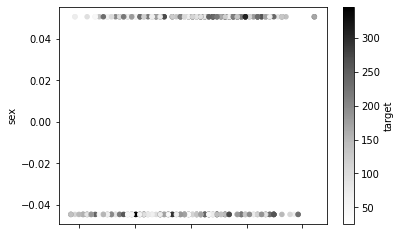

In [450]:
dataset_df.plot.scatter('age', 'sex', c='target')

Executando o pré-processamento e dividindo os dados em teste e treinamento.

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [452]:
X_train.shape

(309, 10)

In [453]:
X_test.shape

(133, 10)

Verificar os dados da estatística descritiva de dois atributos do dataset:

In [454]:
dataset_df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Verificando as informações do conjunto de dados.

In [455]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [456]:
dataset_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Calculando a média aritmética.

In [457]:
dataset_df["age"]=pd.to_numeric(dataset_df["age"],errors='coerce')
primaryType = dataset_df["age"]
primaryType.mean()

-3.6342849293088766e-16

In [458]:
dataset_df["sex"]=pd.to_numeric(dataset_df["sex"],errors='coerce')
secondaryType = dataset_df["sex"]
secondaryType.mean()

1.3083425745511955e-16

Média geométrica

In [459]:
# np.seterr(invalid='ignore')
gmean(primaryType)

nan

In [460]:
gmean(secondaryType)

nan

Média Harmônica

In [461]:
hmean(primaryType)

ValueError: ignored

In [ ]:
hmean(secondaryType)

Mediana

In [ ]:
primaryType.median()

In [ ]:
secondaryType.median()

Moda

In [ ]:
primaryType.mode()

In [ ]:
secondaryType.mode()

Variação

In [ ]:
primaryType.var()

In [ ]:
secondaryType.var()

Desvio padrão

In [ ]:
primaryType.std()

In [ ]:
secondaryType.std()

Valor máximo

In [ ]:
primaryType.max()

In [ ]:
secondaryType.max()

Valor mínimo

In [ ]:
primaryType.min()

In [ ]:
secondaryType.min()

# <b>Treinando a manipulação do dataset (California Housing)</b>

## Usando os exemplos do site da Scikit Learn

- California Housing:


Chamada e set dos valores dos dados

In [462]:
dataset_california = fetch_california_housing()
dataset_california.target[[10, 25, 50]]

array([2.815, 1.075, 1.719])

In [463]:
list(dataset_california.target_names)

['MedHouseVal']

Mudança da passagem dos valores para uma notação da scikit learn:

In [464]:
X,y = fetch_california_housing(return_X_y=True)

Definindo os valores para a tabela do dataframe da base de dados da iris.

In [465]:
dataset_california_df = pd.DataFrame(data=dataset_california.data, columns=dataset_california.feature_names)

In [466]:
dataset_california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Adicionando uma nova coluna para a análise dos dados.

In [467]:
dataset_california_df['target'] = dataset_california.target

In [468]:
dataset_california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Realizando uma plotagem dos dados para amostragem: 

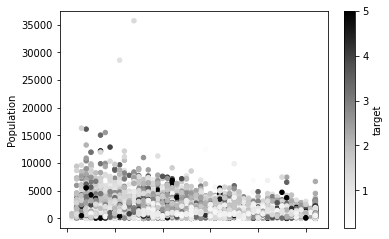

In [469]:
dataset_california_df.plot.scatter('HouseAge', 'Population', c='target')

Executando o pré-processamento e dividindo os dados em teste e treinamento.

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [471]:
X_train.shape

(14448, 8)

In [472]:
X_test.shape

(6192, 8)

Verificar os dados da estatística descritiva de dois atributos do dataset:

In [473]:
dataset_california_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Verificando as informações do conjunto de dados.

In [474]:
dataset_california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [475]:
dataset_california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Calculando a média aritmética.

In [476]:
primaryType = dataset_california_df['HouseAge']
primaryType.mean()

28.639486434108527

In [477]:
secondaryType = dataset_california_df['Population']
secondaryType.mean()

1425.4767441860465

Média geométrica

In [478]:
# np.seterr(invalid='ignore')
gmean(primaryType)

25.15696336552169

In [479]:
gmean(secondaryType)

1123.4007494496084

Média Harmônica

In [480]:
hmean(primaryType)

20.38180106154972

In [481]:
hmean(secondaryType)

715.4096149957797

Mediana

In [482]:
primaryType.median()

29.0

In [483]:
secondaryType.median()

1166.0

Moda

In [484]:
primaryType.mode()

0    52.0
dtype: float64

In [485]:
secondaryType.mode()

0    891.0
dtype: float64

Variação

In [486]:
primaryType.var()

158.39626040778117

In [487]:
secondaryType.var()

1282470.4572332504

Desvio padrão

In [488]:
primaryType.std()

12.585557612111637

In [489]:
secondaryType.std()

1132.4621217653375

Valor máximo

In [490]:
primaryType.max()

52.0

In [491]:
secondaryType.max()

35682.0

Valor mínimo

In [492]:
primaryType.min()

1.0

In [493]:
secondaryType.min()

3.0